In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_product = pd.read_csv('california_product.csv', delimiter = '\t')
prices = df_product['Price']
area = df_product['Area (ft.)']
prices = prices.str.replace('$', '')
prices = prices.str.replace(',', '')
prices = prices.astype(float)
df_product.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1030,1,2005.0,11.0,Apartment,30,743.09,"$246,172.68",Sold
1,1029,1,2005.0,10.0,Apartment,29,756.21,"$246,331.90",Sold
2,2002,2,2007.0,7.0,Apartment,2,587.28,"$209,280.91",Sold
3,2031,2,2007.0,12.0,Apartment,31,1604.75,"$452,667.01",Sold
4,1049,1,2004.0,11.0,Apartment,49,1375.45,"$467,083.31",Sold


In [3]:
df_customer = pd.read_csv('california_customer.csv', delimiter = '\t')
df_country = df_customer['Country']
df_customer.head()

,Customer ID,Entity,Name,Surname,Age at time of purchase,Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,C0028,Individual,Madalyn,Mercer,19,18-25,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,C0027,Individual,Lara,Carrillo,22,18-25,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,C0112,Individual,Donavan,Flowers,22,18-25,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,C0160,Individual,Darien,Dorsey,22,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,C0014,Individual,Alessandra,Perry,25,18-25,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency


Frequency distribution graph (that is a histogram with the highest possible number of bins ).

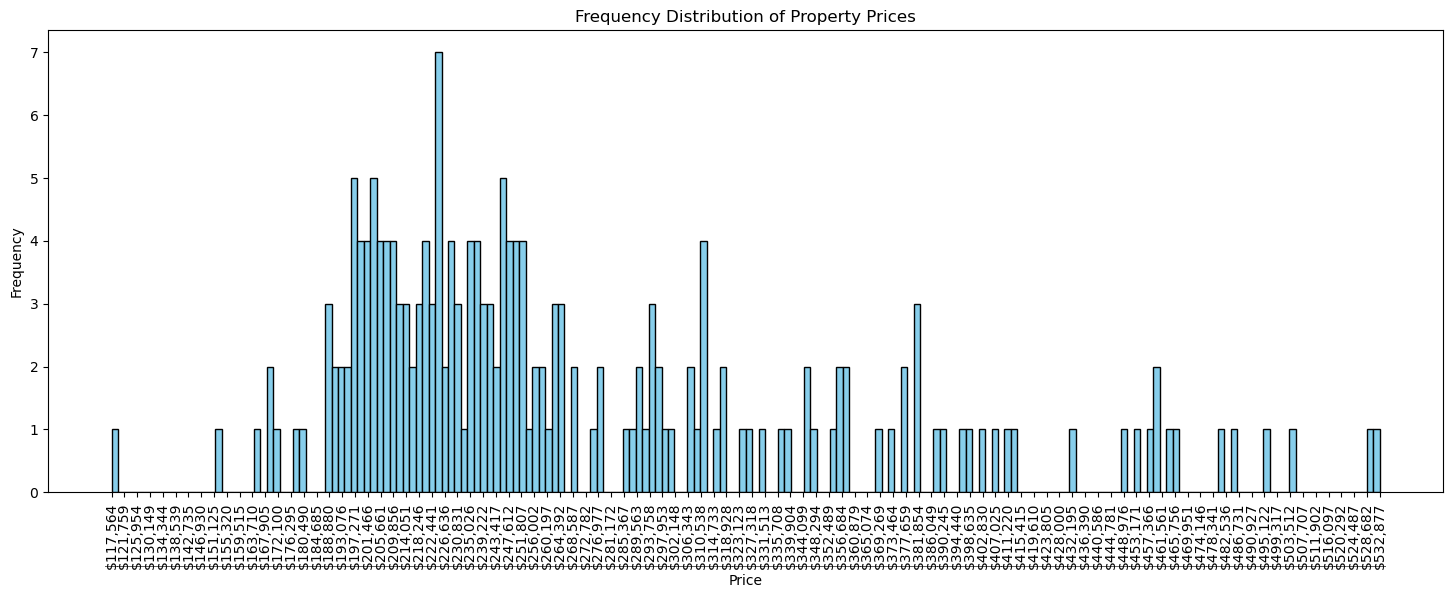

In [4]:
fig, ax = plt.subplots(figsize=(18,6))

bins = len(df_product)
num_ticks = 100  

ticks = np.linspace(
    prices.min(), 
    prices.max(), 
    num_ticks
)

ax.hist(
    prices, 
    bins = bins, 
    color = 'skyblue', 
    edgecolor = 'black'
)
ax.set_xticks(ticks)
ax.set_xticklabels(['${:,.0f}'.format(t) for t in ticks], rotation = 90)

ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.set_title('Frequency Distribution of Property Prices')

plt.show()

#Histogram which represents the Price variable. Choose interval width (bins) of length $100,000.

#Most of the properties' prices are concentrated in the interval ($217,564.07 to 317,564.07)

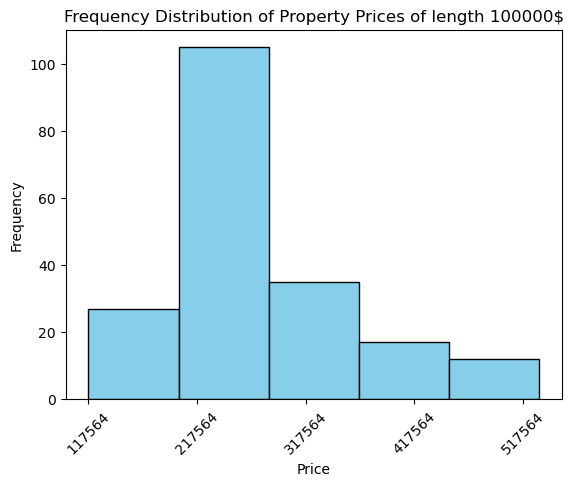

In [5]:
fig, ax1 = plt.subplots()
bins1 = int(prices.max()/100000)
num_ticks1 = bins1
ticks1 = [prices.min() + i * 100000 for i in range(num_ticks1)] 

ax1.hist(
    prices, 
    bins = bins1, 
    color = 'skyblue', 
    edgecolor = 'black'
)
ax1.set_xticks(ticks1)
plt.xticks(rotation = 45)

ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency Distribution of Property Prices of length 100000$')

plt.show()

#Scatter plot showing the relationship between Price and Area.

#The scatter plot shows a very strong linear relationship between Price and Area. This was to be expected as often RE companies price their property per square foot.

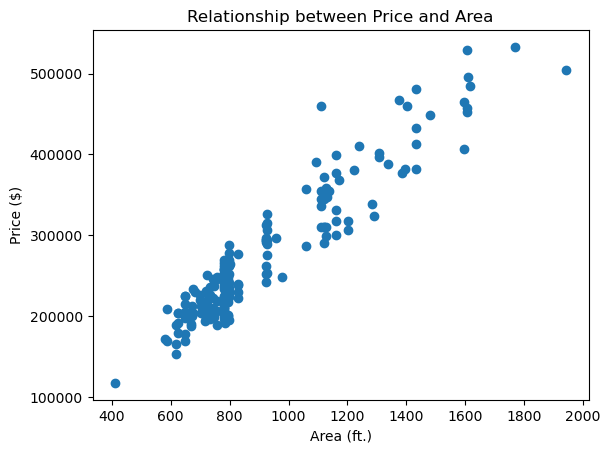

In [6]:
fig, ax2 = plt.subplots()
ax2.scatter(area, prices)

ax2.set_xlabel('Area (ft.)')
ax2.set_ylabel('Price ($)')
ax2.set_title('Relationship between Price and Area')

plt.show()

#frequency distribution table, where listed all the countries from which the company has buyers. Counted the absolute frequency, the relative frequency and the cumulative frequency. 

In [7]:
frequency = df_country.value_counts().values
country = df_country.value_counts().index.tolist()

relative_frequency = (frequency/frequency.sum())*100
relative_frequency_percent = [f'{round(per)} %' for per in relative_frequency]
cumulative_frequency = frequency.cumsum()
cumulative_frequency_percent = [f'{round(per/frequency.sum()*100)} %' for per in cumulative_frequency]

In [8]:
columns = ['Country', 'Frequency', 'Relative frequency', 'Cumulative frequency']

In [9]:
frequency_table_data = list(zip(country, 
                frequency, 
                relative_frequency_percent, 
                cumulative_frequency_percent
               ))
df_frequency = pd.DataFrame(frequency_table_data, columns = columns)

In [10]:
df_frequency

,Country,Frequency,Relative frequency,Cumulative frequency
0,USA,177,91 %,91 %
1,Canada,7,4 %,94 %
2,Russia,4,2 %,96 %
3,UK,2,1 %,97 %
4,Belgium,2,1 %,98 %
5,Denmark,1,1 %,99 %
6,Germany,1,1 %,99 %
7,Mexico,1,1 %,100 %


#Pareto diagram representing the data.

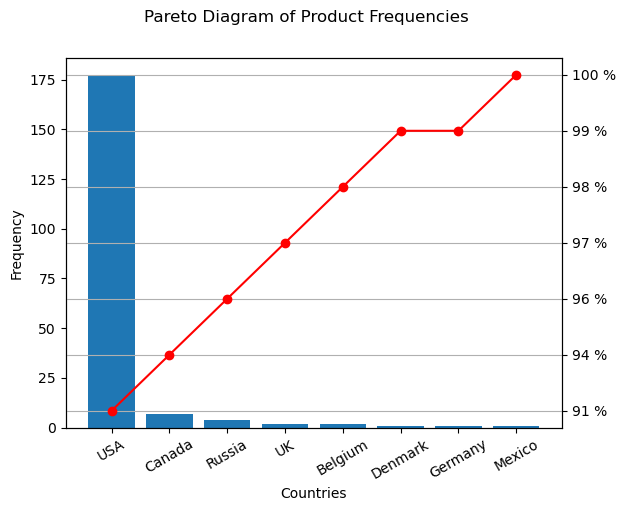

In [11]:
fig, ax3 = plt.subplots()
frequency_col = df_frequency['Frequency']
frequency_country_col = df_frequency['Country']
frequency_cumulative = df_frequency['Cumulative frequency']


ax3.bar(
    frequency_country_col, 
    height = frequency_col
)

plt.xticks(rotation=30)

ax3.set_xlabel('Countries')
ax3.set_ylabel('Frequency')
fig.suptitle('Pareto Diagram of Product Frequencies')

ax4 = ax3.twinx()
ax4.plot(
    frequency_country_col, 
    frequency_cumulative, 
    color='red', 
    marker='o', 
    linestyle='-'
)
ax4.grid(True)
plt.show()

#The mean, median, mode, skewness, variance and standard deviation of Price for all properties.

In [12]:
x_mean = round(np.mean(prices), 2)
print(x_mean)

270778.66


In [13]:
x_median = np.median(prices)
print(x_median)

243936.63


In [14]:
from scipy.stats import mode, skew

x_mode = mode(prices)
print(x_mode)

ModeResult(mode=460001.26, count=2)


#Skew is a bit tougher. The skew is right (positive). This means that most properties are relatively cheap with a tiny portion that is more expensive.

In [15]:
x_skewness = round(skew(prices), 2)
print(x_skewness)

1.23


In [16]:
x_variance = round(np.var(prices), 2)
print(x_variance)

6707440570.21


In [17]:
x_std = round(pow(x_variance, 1/2), 2)
print(x_std)

81898.97


In [18]:
x_var_sum = sum([pow((x-x_mean),2) for x in prices])
x_variance = round(x_var_sum/(len(prices)), 2)
print(x_variance)

6707440570.21


#The covariance and correlation coefficient between Price and Area.

In [19]:
y_mean = round(np.mean(area), 2)
y_median = np.median(area)
y_mode = mode(area)
y_skewness = round(skew(area), 2)
covariance_sum = sum((x-x_mean)*(y-y_mean) for x, y in zip(prices, area))
covariance = round(covariance_sum/len(prices), 2)
print(covariance)

20682605.49


In [20]:
y_variance_sum = sum([pow((y-y_mean),2) for y in area])
y_variance = round(y_variance_sum/len(area), 2)
y_std = round(pow(y_variance, 1/2), 2)
print(y_std)

267.43


In [21]:
correlation = round(covariance/(x_std*y_std), 2)
print(correlation)

0.94


In [22]:
measures_of_central_tendency = {
    'mean': [x_mean, y_mean], 
    'median': [x_median, y_median],
    'mode': [x_mode, y_mode],
    'skewness': [x_skewness, y_skewness],
    'variance': [x_variance, y_variance],
    'standard deviation': [x_std, y_std]
}

In [23]:
df = pd.DataFrame(measures_of_central_tendency).transpose()
df = df.rename(columns= {0:'Price', 1:'Area (ft.)'})
df

,Price,Area (ft.)
mean,270778.66,904.3
median,243936.63,788.01
mode,"(460001.26, 2)","(781.07, 14)"
skewness,1.23,1.4
variance,6707440570.21,71517.68
standard deviation,81898.97,267.43


In [24]:
print('covariance between Price and Area is ', covariance)
print('correlation between Price and Area is ', correlation)

covariance between Price and Area is  20682605.49
correlation between Price and Area is  0.94
